# **MÉDIA MÓVEL**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 5

**Desvios da temperatura média global da terra-oceano (com referência a média de 1951-1980), medidos em graus Celsius, para os anos de 1880-2015.**

 Iremos analisar o desvio da temperatura de 1880 a 2015 com base na média de 1951 a 1980

 Analisar a média movel do desvio da temperatura global

In [3]:
temperatura = pd.read_csv('temp_global.csv')

Observa-se que a base de dados contem apenas uma variável, que contem o desvio da temperatura.

In [4]:
temperatura

,x
1,-0.20
2,-0.11
3,-0.10
4,-0.20
5,-0.28
...,...
132,0.60
133,0.63
134,0.66
135,0.75


Por isso teremos que montar o índice para adicionar a variavel tempo

In [5]:
indice = pd.date_range('1880 Jan 1', periods = len(temperatura), freq = 'Y')
indice

DatetimeIndex(['1880-12-31', '1881-12-31', '1882-12-31', '1883-12-31',
               '1884-12-31', '1885-12-31', '1886-12-31', '1887-12-31',
               '1888-12-31', '1889-12-31',
               ...
               '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31'],
              dtype='datetime64[ns]', length=136, freq='A-DEC')

Criando a série temporal com a temperatura , esta alocada no dataframe na coluna 'x' e adicionando o indice(datas)

Associando a diferença de temperatura com as datas

In [6]:
serie = pd.Series(temperatura['x'].values, index = indice)
serie

1880-12-31   -0.20
1881-12-31   -0.11
1882-12-31   -0.10
1883-12-31   -0.20
1884-12-31   -0.28
              ... 
2011-12-31    0.60
2012-12-31    0.63
2013-12-31    0.66
2014-12-31    0.75
2015-12-31    0.87
Freq: A-DEC, Length: 136, dtype: float64

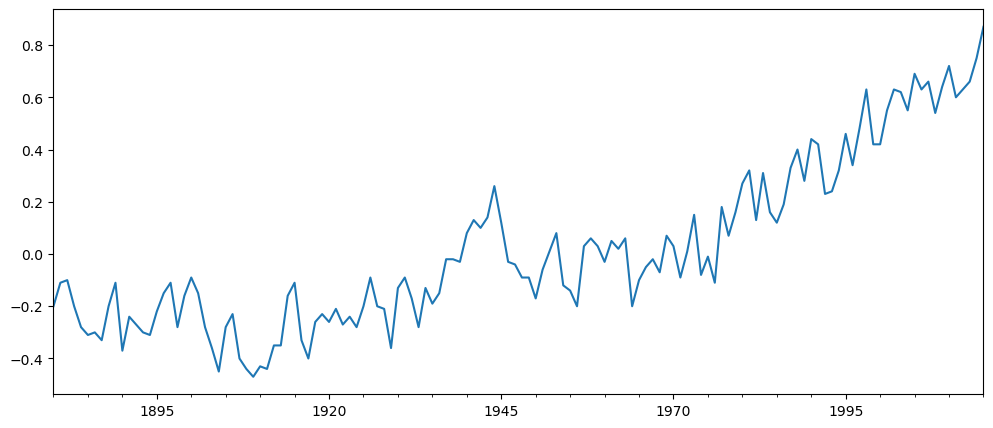

In [7]:
serie.plot();

Observa-se uma série aparentemente constante até aproximadamente 1935, depois temos um leve aumento de desvio ate 1980, e apos esse periodo temos um tendencia de crescimento maior .

Observamos uma certa sazonalidade, nao tao clara. e a partir de 1970 uma tendencia crescente

Criando a média movel

window => período de referencia, neste caso estamos utilizando 3 anos

Depois retira-se a média considerando esse periodo de referencia


In [8]:
media_movel1 = serie.rolling(window=3)
media_movel1 = media_movel1.mean()

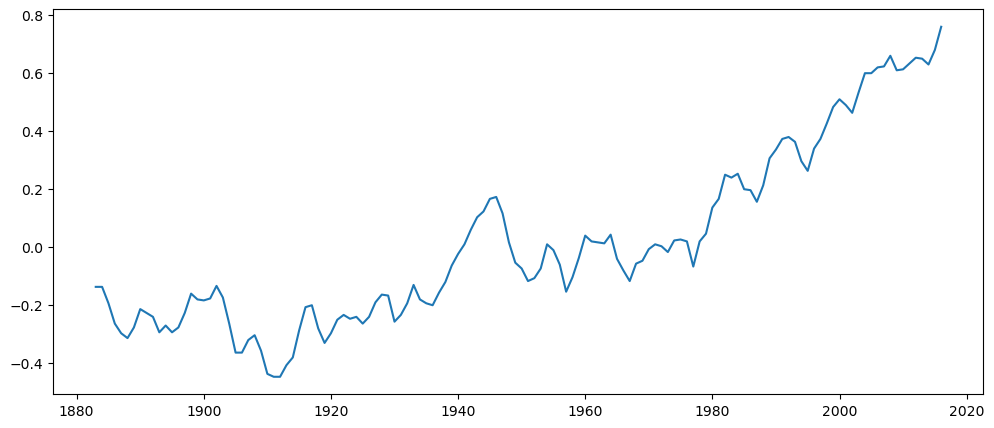

In [9]:
plt.plot(media_movel1);

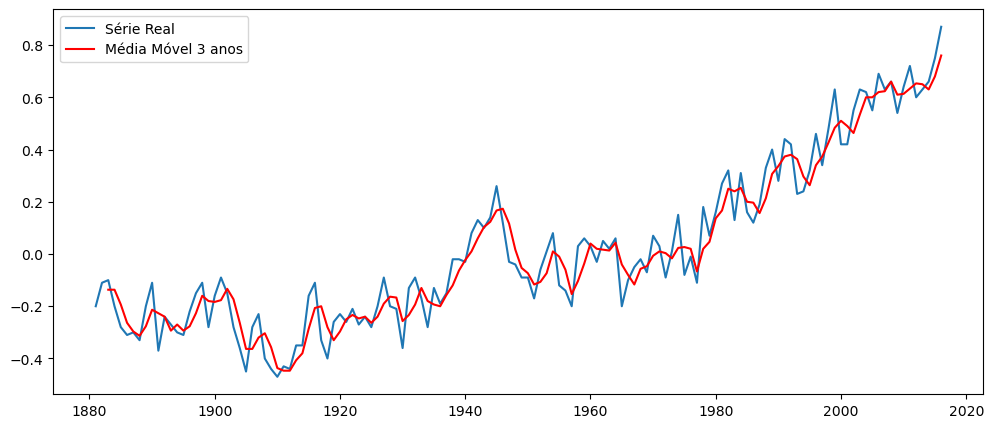

In [10]:
plt.plot(serie, label='Série Real')
plt.plot(media_movel1,color='red', label='Média Móvel 3 anos')
plt.legend(loc='best')
plt.show()

MMS - Média móvel simples,  perda dos tres anos iniciais

Observa-se uma suavização dos picos , evidenciação da tendencia

Média movel com período maior -> Maior suavização

In [11]:
media_movel2 = serie.rolling(window=10)
media_movel2 = media_movel2.mean()

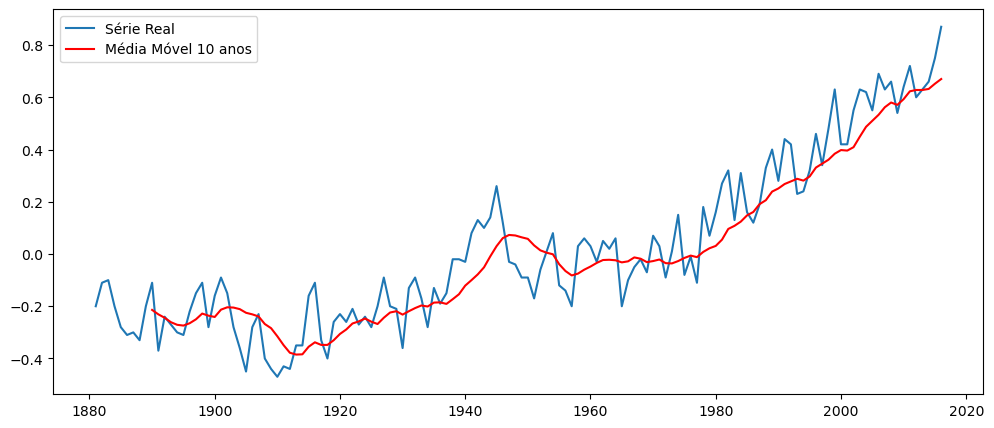

In [12]:
plt.plot(serie, label='Série Real')
plt.plot(media_movel2,color='red', label='Média Móvel 10 anos')
plt.legend(loc='best')
plt.show()

Quanto maior a suavizção - > Clareza da tendencia

In [13]:
media_movel3 = serie.rolling(window=20)
media_movel3 = media_movel3.mean()

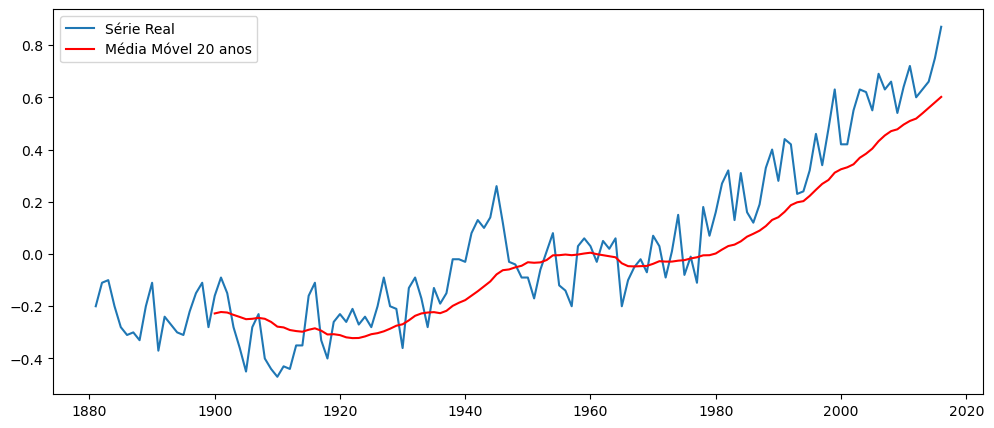

In [14]:
plt.plot(serie, label='Série Real')
plt.plot(media_movel3,color='red', label='Média Móvel 20 anos')
plt.legend(loc='best')
plt.show()

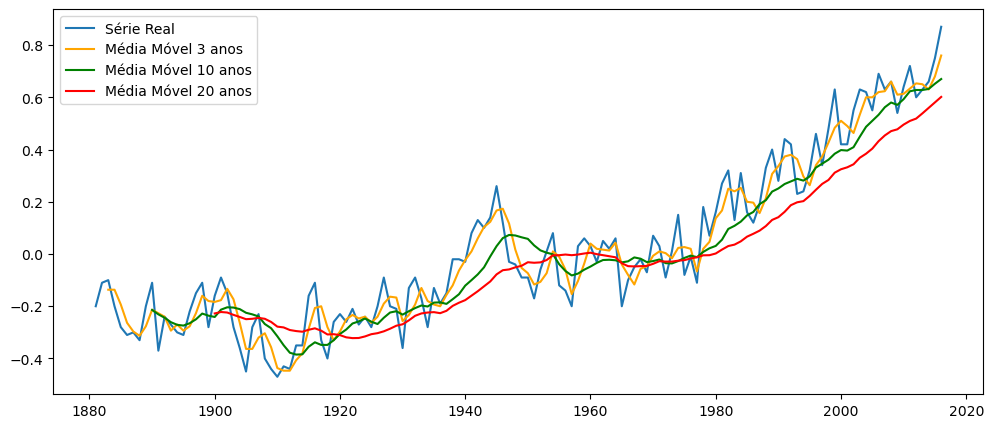

In [15]:
plt.plot(serie, label='Série Real')
plt.plot(media_movel1,color='orange', label='Média Móvel 3 anos');
plt.plot(media_movel2,color='green', label='Média Móvel 10 anos');
plt.plot(media_movel3,color='red', label='Média Móvel 20 anos');
plt.legend(loc='best')
plt.show()

Média movel simples - simétrica

In [16]:
media_movel4 = serie.rolling(window=3,center=True)
media_movel4 = media_movel4.mean()

In [17]:
media_movel5 = serie.rolling(window=10,center=True)
media_movel5 = media_movel5.mean()

In [18]:
media_movel6 = serie.rolling(window=20,center=True)
media_movel6 = media_movel6.mean()

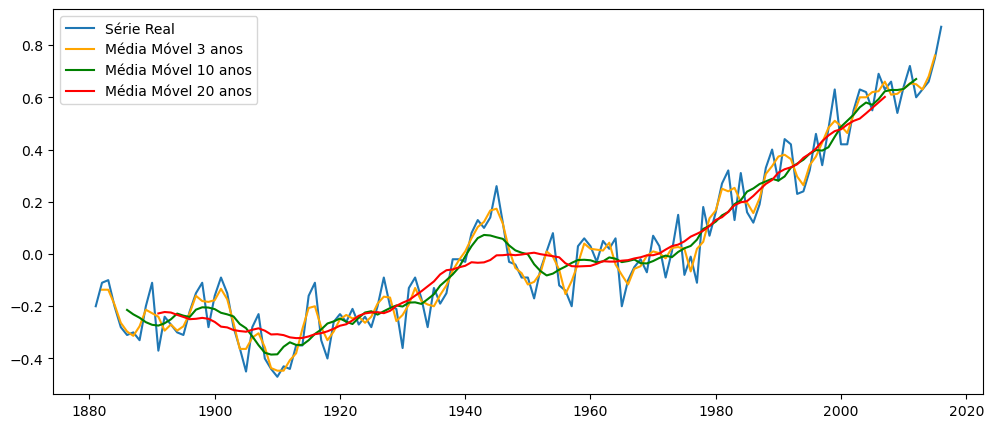

In [19]:
plt.plot(serie, label='Série Real')
plt.plot(media_movel4,color='orange', label='Média Móvel 3 anos');
plt.plot(media_movel5,color='green', label='Média Móvel 10 anos');
plt.plot(media_movel6,color='red', label='Média Móvel 20 anos');
plt.legend(loc='best')
plt.show()

Neste caso a tendencia ficou melhor definida para a média móvel simétrica